# Energy Consumption Analysis for Sustainable Buildings
## Case Study
The objective of this project is to analyze the energy consumption patterns for a set of sustainable buildings. 
You will analyze trends, identify inefficiencies, and make recommendations for improving energy usage.

## Instructions
1. **Data Loading and Exploration**: Load the datasets provided and explore the data to understand its structure.
2. **Correlation Analysis**: Analyze correlations between energy usage and external factors like weather.
3. **Energy Efficiency Insights**: Identify trends, outliers, and inefficiencies in energy consumption across buildings.
4. **Recommendations**: Based on the insights, make data-driven recommendations for improving energy efficiency.
5. **Optional**: Build a dashboard to visualize energy usage patterns and recommendations.


In [2]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the datasets
energy_usage = pd.read_csv('data/energy_usage.csv')
building_specs = pd.read_csv('data/building_specs.csv')
weather_data = pd.read_csv('data/weather.csv')

# Display the first few rows of each dataset
display(energy_usage.head())
display(building_specs.head())
display(weather_data.head())


,building_id,month,electricity_usage_kwh,gas_usage_m3,water_usage_l,total_energy_cost_eur,location
0,B001,2023-01,2744.550020,937.376673,1756.725755,433.956349,CityB
1,B001,2023-02,3617.049708,313.607027,842.018528,529.417977,CityB
2,B001,2023-03,1215.490977,1001.362652,1514.032817,239.828295,CityB
3,B001,2023-04,4173.450579,145.887462,2053.587145,589.786467,CityB
4,B001,2023-05,4649.627895,309.942622,863.096271,672.430599,CityB


,building_id,location,building_size_m2,occupants,year_built,building_type,insulation_rating,solar_panels,heating_type
0,B001,CityB,3080.151688,37,2012,Residential,3,True,Gas
1,B002,CityD,2237.461870,165,2019,Commercial,3,False,Gas
2,B003,CityE,1465.651039,50,1981,Residential,3,False,Solar
3,B004,CityA,3450.751859,97,2005,Commercial,2,False,Electric
4,B005,CityC,1768.346486,62,1990,Residential,4,False,Gas


,location,month,avg_temperature_celsius,precipitation_mm,humidity_percent,solar_radiation_kwh_m2
0,CityA,2023-01,33.272035,67.676990,58.951257,4.930257
1,CityA,2023-02,-1.668624,9.170415,66.146456,5.537031
2,CityA,2023-03,3.509116,94.619454,76.877763,1.134646
3,CityA,2023-04,32.237164,97.424821,89.755875,0.558712
4,CityA,2023-05,24.481422,54.591577,72.349889,9.686519


### Data Cleaning and Preprocessing
Before performing any analysis, ensure that the datasets are clean and consistent.
- Check for missing values and handle them appropriately.
- Ensure that data types are correctly set (e.g., dates are recognized as datetime).

In [3]:
# Check for missing values
print(energy_usage.isnull().sum())
print(building_specs.isnull().sum())
print(weather_data.isnull().sum())

# Convert 'month' to datetime in energy_usage and weather_data
energy_usage['month'] = pd.to_datetime(energy_usage['month'], format='%Y-%m')
weather_data['month'] = pd.to_datetime(weather_data['month'], format='%Y-%m')


building_id              0
month                    0
electricity_usage_kwh    0
gas_usage_m3             0
water_usage_l            0
total_energy_cost_eur    0
location                 0
dtype: int64
building_id          0
location             0
building_size_m2     0
occupants            0
year_built           0
building_type        0
insulation_rating    0
solar_panels         0
heating_type         0
dtype: int64
location                   0
month                      0
avg_temperature_celsius    0
precipitation_mm           0
humidity_percent           0
solar_radiation_kwh_m2     0
dtype: int64


In [7]:
print(building_specs["location"].unique())
print(weather_data["location"].unique())
building_specs["location"] = building_specs["location"].astype(str).str.strip()
weather_data["location"] = weather_data["location"].astype(str).str.strip()

['CityB' 'CityD' 'CityE' 'CityA' 'CityC']
['CityA' 'CityB' 'CityC' 'CityD' 'CityE']


### Correlation Analysis
Now, let's look at how energy consumption correlates with weather conditions.
- Does temperature or humidity affect electricity, gas, or water usage?


In [10]:
# Merge energy usage with weather data based on month and location
merged_data = pd.merge(energy_usage, building_specs[['building_id', 'location']], on=['building_id', 'location'])
display(merged_data)
merged_data = pd.merge(merged_data, weather_data, on=['location', 'month'])

# Calculate correlations
correlation_matrix = merged_data[['electricity_usage_kwh', 'gas_usage_m3', 'water_usage_l',
                                'avg_temperature_celsius', 'precipitation_mm',
                                'humidity_percent', 'solar_radiation_kwh_m2']].corr()
correlation_matrix

,building_id,month,electricity_usage_kwh,gas_usage_m3,water_usage_l,total_energy_cost_eur,location
0,B001,2023-01-01,2744.550020,937.376673,1756.725755,433.956349,CityB
1,B001,2023-02-01,3617.049708,313.607027,842.018528,529.417977,CityB
2,B001,2023-03-01,1215.490977,1001.362652,1514.032817,239.828295,CityB
3,B001,2023-04-01,4173.450579,145.887462,2053.587145,589.786467,CityB
4,B001,2023-05-01,4649.627895,309.942622,863.096271,672.430599,CityB
...,...,...,...,...,...,...,...
115,B010,2023-08-01,3472.042321,803.753956,655.943383,562.562510,CityA
116,B010,2023-09-01,2793.705867,653.060228,1343.106611,418.063549,CityA
117,B010,2023-10-01,4612.714860,733.577158,889.383384,708.255601,CityA
118,B010,2023-11-01,1383.470026,763.337905,629.613864,235.717141,CityA


,electricity_usage_kwh,gas_usage_m3,water_usage_l,avg_temperature_celsius,precipitation_mm,humidity_percent,solar_radiation_kwh_m2
electricity_usage_kwh,1.000000,0.048661,-0.071950,0.138483,-0.182348,-0.059251,0.045320
gas_usage_m3,0.048661,1.000000,0.025008,-0.182323,0.031393,0.017544,-0.015421
water_usage_l,-0.071950,0.025008,1.000000,-0.040061,0.084816,0.043824,0.060970
avg_temperature_celsius,0.138483,-0.182323,-0.040061,1.000000,0.133835,0.124105,-0.032697
precipitation_mm,-0.182348,0.031393,0.084816,0.133835,1.000000,0.242813,-0.123597
humidity_percent,-0.059251,0.017544,0.043824,0.124105,0.242813,1.000000,-0.047607
solar_radiation_kwh_m2,0.045320,-0.015421,0.060970,-0.032697,-0.123597,-0.047607,1.000000


### Visualizing Trends
Create visualizations to identify trends in energy consumption over time.
- How do electricity, gas, and water usage fluctuate over the months?
- Are there any seasonal trends?


,electricity_usage_kwh,gas_usage_m3,water_usage_l,avg_temperature_celsius,precipitation_mm,humidity_percent,solar_radiation_kwh_m2
month,,,,,,,
2023-01-01,2754.193954,573.034352,1425.695006,17.126439,66.509081,61.516978,4.785987
2023-02-01,3311.687514,626.939610,1277.417946,16.602695,17.126780,62.891948,5.112014
2023-03-01,2612.350439,709.350193,1373.998659,2.971091,71.483023,72.063386,3.907953
2023-04-01,3009.588176,544.066444,1269.930032,21.850607,60.525968,64.741031,3.812224
2023-05-01,3864.932823,666.480495,1429.107087,16.625645,63.741658,68.379350,6.740215
2023-06-01,3096.830111,644.914935,1550.549668,20.724695,50.325643,68.993136,6.776020
2023-07-01,3269.470981,713.068019,1281.767571,19.660038,25.904015,50.238315,5.909994
2023-08-01,2795.941197,571.389005,1104.623851,13.546818,65.115411,55.182752,3.393808
2023-09-01,2935.437271,636.068484,1457.767472,22.613055,56.311016,49.004460,5.199759


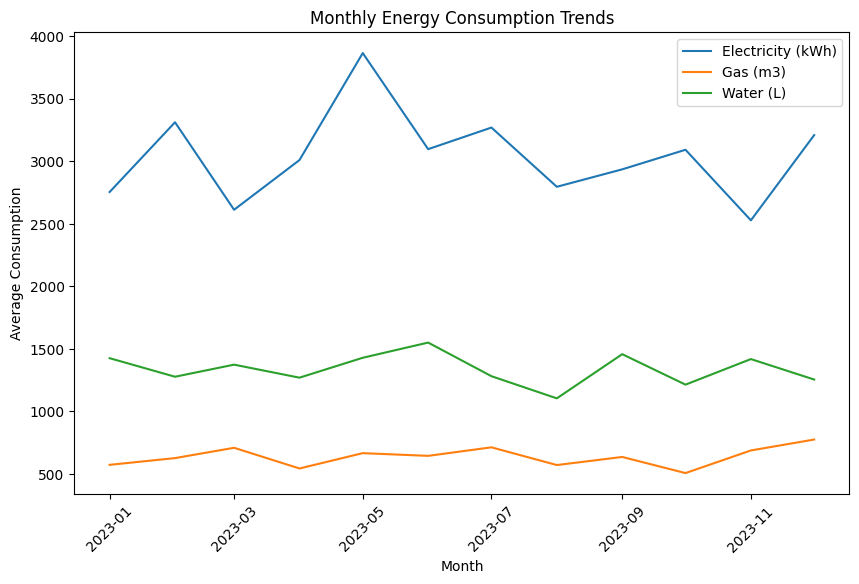

In [14]:
# Group by month and calculate the average of numeric columns only
numeric_columns = [
    "electricity_usage_kwh",
    "gas_usage_m3",
    "water_usage_l",
    "avg_temperature_celsius",
    "precipitation_mm",
    "humidity_percent",
    "solar_radiation_kwh_m2",
]

monthly_avg = merged_data.groupby("month")[numeric_columns].mean()

display(monthly_avg)

# Plot electricity, gas, and water usage
plt.figure(figsize=(10, 6))
plt.plot(
    monthly_avg.index, monthly_avg["electricity_usage_kwh"], label="Electricity (kWh)"
)
plt.plot(monthly_avg.index, monthly_avg["gas_usage_m3"], label="Gas (m3)")
plt.plot(monthly_avg.index, monthly_avg["water_usage_l"], label="Water (L)")
plt.xticks(rotation=45)
plt.xlabel("Month")
plt.ylabel("Average Consumption")
plt.title("Monthly Energy Consumption Trends")
plt.legend()
plt.show()

### Insights and Recommendations
Based on the analysis and visualizations, identify inefficiencies or trends in the data.
- Are certain buildings using more energy than others?
- What interventions could reduce energy consumption?
- Are there correlations between weather and energy that suggest seasonal optimizations?